#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Tema 1 Agrupamiento / Clustering con el método K-means Alumno: Ibarra Ramírez Sergio </font>

Se importan librerias necesarias

In [3]:
import numpy as np
from matplotlib import pyplot as plt 
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('ggplot')

Para utilizar la distancia Euclidiana 

In [10]:
np.sqrt((8-3)**2 + (10-10.5)**2)

5.024937810560445

Otra forma de hacerlo es obteniendo la norma del vector construido como la diferencia de dos arreglos 

In [11]:
np.linalg.norm(np.array([8, 10]) - np.array([3, 10.5]))

5.024937810560445

Definimos la data a clasificar y los centroides iniciales 

In [13]:
data = np.array([[8, 10], [3, 10.5], [7, 13.5], [5, 18], [5, 13], [6, 9], [9, 11], [3, 18], [8.5, 12], [8, 16]])
C = np.array([[8, 10], [3, 10.5]])

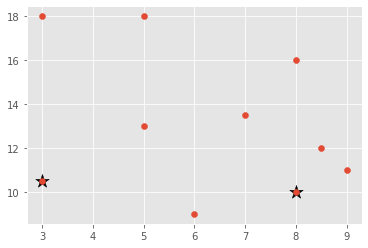

In [14]:
## Grafica de centroides iniciales y la data a clasificar
fig = plt.figure()
plt.scatter(C[:,0],C[:,1], marker='*', s=200, c='k')
plt.scatter(data[:,0], data[:,1])

Debemos calcular la distancia de cada punto a cada centroide y definir a que centroide pertenencen

In [15]:
distances = []
clusters = np.zeros(len(data))



#Vamos a definir una función que clacule distancias 

def dist (a,b,ax=1):
    return np.linalg.norm(a-b, axis=ax)

for i in range(len(data)):
    ##Distance es un vector de dos 
    distance = dist(data[i], C)
    distances.append(distance)
    ## Indica 0 si la distance menor es al primero punto o 1 
    cluster = np.argmin(distance)
    clusters[i] = cluster

print(clusters)
distances


[0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]


[array([0.        , 5.02493781]),
 array([5.02493781, 0.        ]),
 array([3.64005494, 5.        ]),
 array([8.54400375, 7.76208735]),
 array([4.24264069, 3.20156212]),
 array([2.23606798, 3.35410197]),
 array([1.41421356, 6.02079729]),
 array([9.43398113, 7.5       ]),
 array([2.06155281, 5.70087713]),
 array([6.        , 7.43303437])]

Ejemplo con otro centroide adicional

In [16]:
data = np.array([[8, 10], [3, 10.5], [7, 13.5], [5, 18], [5, 13], [6, 9], [9, 11], [3, 18], [8.5, 12], [8, 16]])
C2 = np.array([[8, 10], [3, 10.5], [6, 16]])

In [17]:
distances2 = []
clusters2 = np.zeros(len(data))



#Vamos a definir una función que clacule distancias 

def dist (a,b,ax=1):
    return np.linalg.norm(a-b, axis=ax)

for i in range(len(data)):
    ##Distance es un vector de dos 
    distance = dist(data[i], C2)
    distances2.append(distance)
    ## Indica 0 si la distance menor es al primero punto o 1 
    cluster = np.argmin(distance)
    clusters2[i] = cluster

print(clusters2)
distances2

[0. 1. 2. 2. 2. 0. 0. 2. 0. 2.]


[array([0.        , 5.02493781, 6.32455532]),
 array([5.02493781, 0.        , 6.26498204]),
 array([3.64005494, 5.        , 2.6925824 ]),
 array([8.54400375, 7.76208735, 2.23606798]),
 array([4.24264069, 3.20156212, 3.16227766]),
 array([2.23606798, 3.35410197, 7.        ]),
 array([1.41421356, 6.02079729, 5.83095189]),
 array([9.43398113, 7.5       , 3.60555128]),
 array([2.06155281, 5.70087713, 4.71699057]),
 array([6.        , 7.43303437, 2.        ])]

Ahora, vamos a intentar implementar la segunda parte del algoritmo que recalcula los centroides 

In [19]:
distances = []
clusters = np.zeros(len(data))



#Vamos a definir una función que clacule distancias 

def dist (a,b,ax=1):
    return np.linalg.norm(a-b, axis=ax)

for i in range(len(data)):
    ##Distance es un vector de dos 
    distance = dist(data[i], C)
    distances.append(distance)
    ## Indica 0 si la distance menor es al primero punto o 1 
    cluster = np.argmin(distance)
    clusters[i] = cluster

print(clusters)
distances

[0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]


[array([0.        , 5.02493781]),
 array([5.02493781, 0.        ]),
 array([3.64005494, 5.        ]),
 array([8.54400375, 7.76208735]),
 array([4.24264069, 3.20156212]),
 array([2.23606798, 3.35410197]),
 array([1.41421356, 6.02079729]),
 array([9.43398113, 7.5       ]),
 array([2.06155281, 5.70087713]),
 array([6.        , 7.43303437])]

In [22]:
for i in range(len(C)):
    ##Vamos a determinar que puntos pertenencen a cada cluster 
    ## Se ha´ra uso de list comprehensiotn (completando para todos los datos)
    ## Se indica como se obtiene el elemento j-esimo para un ciclo for 
    points = [data[j] for j in range(len(data)) if clusters[j]==i]
    print(points)
    ##Se asigna al centroide determinado
    C[i] = np.mean(points, axis=0)
print(C)


[array([ 8., 10.]), array([ 7. , 13.5]), array([6., 9.]), array([ 9., 11.]), array([ 8.5, 12. ]), array([ 8., 16.])]
[array([ 3. , 10.5]), array([ 5., 18.]), array([ 5., 13.]), array([ 3., 18.])]
[[ 7.75       11.91666667]
 [ 4.         14.875     ]]


Veamos ahora graficamente como se encuentran nuestros 'nuevos centroides' con respecto a nuestra data

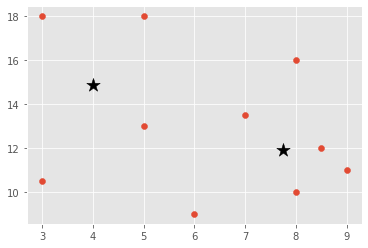

In [24]:
## Grafica de centroides iniciales y la data a clasificar
fig = plt.figure()
plt.scatter(C[:,0],C[:,1], marker='*', s=200, c='k')
plt.scatter(data[:,0], data[:,1])

Ejemplo con otro centroide adicional (paso2 de recalcular centroides del algoritmo)

In [ ]:
distances2 = []
clusters2 = np.zeros(len(data))



#Vamos a definir una función que clacule distancias 

def dist (a,b,ax=1):
    return np.linalg.norm(a-b, axis=ax)

for i in range(len(data)):
    ##Distance es un vector de dos 
    distance = dist(data[i], C2)
    distances2.append(distance)
    ## Indica 0 si la distance menor es al primero punto o 1 
    cluster = np.argmin(distance)
    clusters2[i] = cluster

print(clusters2)
distances2

In [25]:
for i in range(len(C2)):
    ##Vamos a determinar que puntos pertenencen a cada cluster 
    ## Se ha´ra uso de list comprehensiotn (completando para todos los datos)
    ## Se indica como se obtiene el elemento j-esimo para un ciclo for 
    points2 = [data[j] for j in range(len(data)) if clusters2[j]==i]
    print(points2)
    ##Se asigna al centroide determinado
    C2[i] = np.mean(points2, axis=0)
print(C2)

[array([ 8., 10.]), array([6., 9.]), array([ 9., 11.]), array([ 8.5, 12. ])]
[array([ 3. , 10.5])]
[array([ 7. , 13.5]), array([ 5., 18.]), array([ 5., 13.]), array([ 3., 18.]), array([ 8., 16.])]
[[ 7.875 10.5  ]
 [ 3.    10.5  ]
 [ 5.6   15.7  ]]


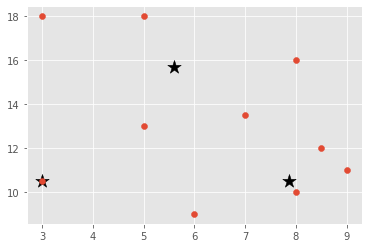

In [27]:
## Grafica de centroides iniciales y la data a clasificar
fig = plt.figure()
plt.scatter(C2[:,0],C2[:,1], marker='*', s=200, c='k')
plt.scatter(data[:,0], data[:,1])

Algoritmo completo de k means implementado en Python 

In [28]:
import numpy as np

data = np.array([[8, 10], [3, 10.5], [7, 13.5], [5, 18], [5, 13], [6, 9], [9, 11], [3, 18], [8.5, 12], [8, 16]])
C = np.array([[8, 10], [3, 10.5]])


In [29]:

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Initial centroids
prev_C = C.copy()

while True:
    distances = []
    clusters = np.zeros(len(data))

    for i in range(len(data)):
        distance = dist(data[i], C)
        distances.append(distance)
        cluster = np.argmin(distance)
        clusters[i] = cluster

    for i in range(len(C)):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)

    if np.linalg.norm(C - prev_C) <= 0.001:
        break

    prev_C = C.copy()

print("Final centroids:")
print(C)


Final centroids:
[[ 7.75       11.91666667]
 [ 4.         14.875     ]]


Algoritmo completo de k means implementado en Python  (para el caso de más de dos centroides)

In [30]:
data = np.array([[8, 10], [3, 10.5], [7, 13.5], [5, 18], [5, 13], [6, 9], [9, 11], [3, 18], [8.5, 12], [8, 16]])
C2 = np.array([[8, 10], [3, 10.5], [6, 16]])

In [31]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Initial centroids
prev_C2 = C2.copy()

while True:
    distances2 = []
    clusters2 = np.zeros(len(data))

    for i in range(len(data)):
        distance = dist(data[i], C)
        distances2.append(distance)
        cluster = np.argmin(distance)
        clusters2[i] = cluster

    for i in range(len(C)):
        points2 = [data[j] for j in range(len(data)) if clusters2[j] == i]
        C2[i] = np.mean(points2, axis=0)

    if np.linalg.norm(C2 - prev_C2) <= 0.001:
        break

    prev_C2 = C2.copy()

print("Final centroids:")
print(C2)

Final centroids:
[[ 7.75       11.91666667]
 [ 4.         14.875     ]
 [ 6.         16.        ]]
